In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'liguria'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,7,Liguria,1,0,1,0,1,1,1,...,0.0,38.0,0.0,0.0,0.00,100.00,2.63,0.00,0.00,0.00
1,2020-02-26T18:00:00,7,Liguria,6,0,6,5,11,10,10,...,0.0,27.0,0.0,5.0,0.00,54.55,37.04,0.00,0.00,1000.00
2,2020-02-27T18:00:00,7,Liguria,9,0,9,10,19,8,8,...,0.0,12.0,0.0,5.0,0.00,47.37,66.67,0.00,0.00,72.73
3,2020-02-28T18:00:00,7,Liguria,9,0,9,10,19,0,0,...,0.0,34.0,0.0,0.0,0.00,47.37,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,7,Liguria,4,1,5,33,38,19,23,...,0.0,9.0,0.0,23.0,20.00,13.16,255.56,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2021-03-21T17:00:00,7,Liguria,586,59,645,5306,5951,35,380,...,5.0,5173.0,2117.0,40.0,9.15,10.84,7.35,17.95,-9.23,0.59
391,2021-03-22T17:00:00,7,Liguria,602,58,660,5364,6024,73,294,...,8.0,3752.0,1379.0,58.0,8.79,10.96,7.84,21.32,-1.69,1.23
392,2021-03-23T17:00:00,7,Liguria,604,65,669,5286,5955,-69,360,...,6.0,7583.0,2724.0,-78.0,9.72,11.23,4.75,13.22,12.07,-1.15
393,2021-03-24T17:00:00,7,Liguria,597,63,660,5133,5793,-162,420,...,8.0,7601.0,2680.0,-153.0,9.55,11.39,5.53,15.67,-3.08,-2.72


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 494
Nuovi tamponi: 7721.0
Percentuale nuovi positivi/nuovi tamponi: 6.4 %
Nuovi guariti: 122.0
Nuovi deceduti: 10.0
Variazione positivi ricoverati con sintomi: -8.0
Variazione positivi in terapia intensiva: 2.0
Variazione positivi in isolamento dimiciliare: 368.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-24T17:00:00,7,Liguria,603,64,667,3945,4612,42,293,...,15.0,4812.0,1902.0,31.0,9.60,14.46,6.09,15.40,-1.54,0.92
1,2021-01-25T17:00:00,7,Liguria,622,67,689,3849,4538,-74,164,...,6.0,2992.0,1117.0,-96.0,9.72,15.18,5.48,14.68,4.69,-1.60
2,2021-01-26T17:00:00,7,Liguria,617,65,682,3735,4417,-121,271,...,17.0,7356.0,2996.0,-114.0,9.53,15.44,3.68,9.05,-2.99,-2.67
3,2021-01-27T17:00:00,7,Liguria,591,68,659,3586,4245,-172,268,...,20.0,7138.0,2680.0,-149.0,10.32,15.52,3.75,10.00,4.62,-3.89
4,2021-01-28T17:00:00,7,Liguria,588,67,655,3591,4246,1,372,...,22.0,7308.0,2935.0,5.0,10.23,15.43,5.09,12.67,-1.47,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-21T17:00:00,7,Liguria,586,59,645,5306,5951,35,380,...,5.0,5173.0,2117.0,40.0,9.15,10.84,7.35,17.95,-9.23,0.59
57,2021-03-22T17:00:00,7,Liguria,602,58,660,5364,6024,73,294,...,8.0,3752.0,1379.0,58.0,8.79,10.96,7.84,21.32,-1.69,1.23
58,2021-03-23T17:00:00,7,Liguria,604,65,669,5286,5955,-69,360,...,6.0,7583.0,2724.0,-78.0,9.72,11.23,4.75,13.22,12.07,-1.15
59,2021-03-24T17:00:00,7,Liguria,597,63,660,5133,5793,-162,420,...,8.0,7601.0,2680.0,-153.0,9.55,11.39,5.53,15.67,-3.08,-2.72


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

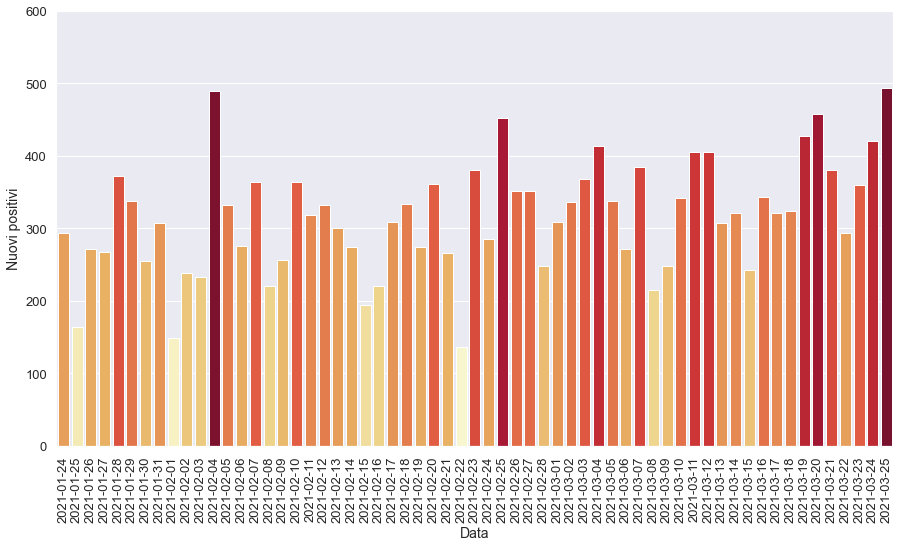

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

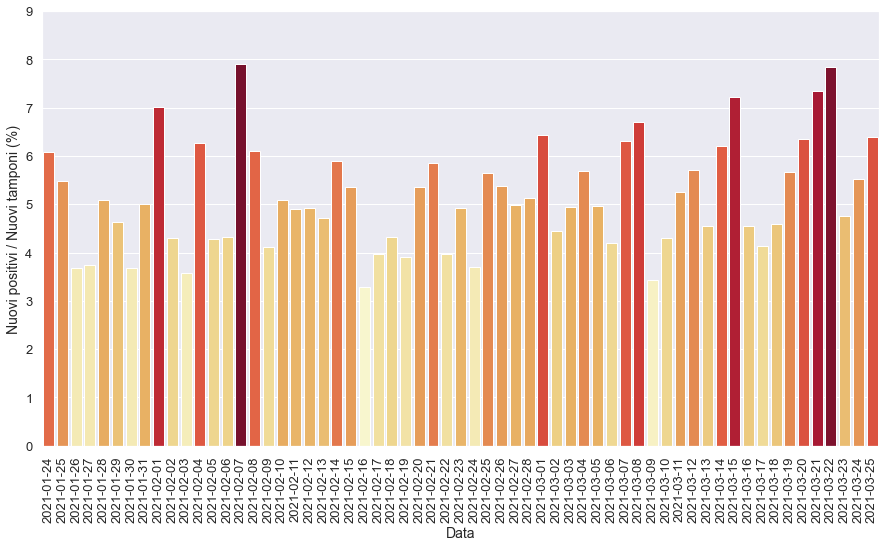

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

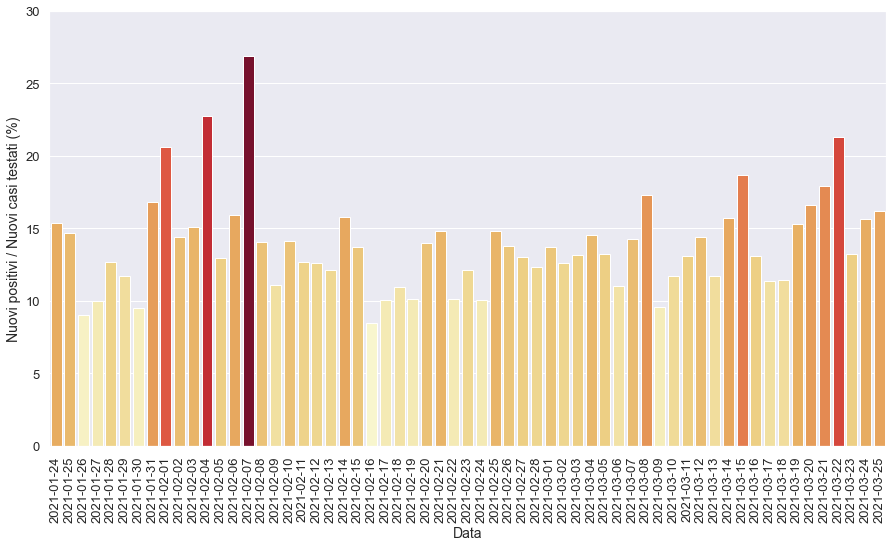

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

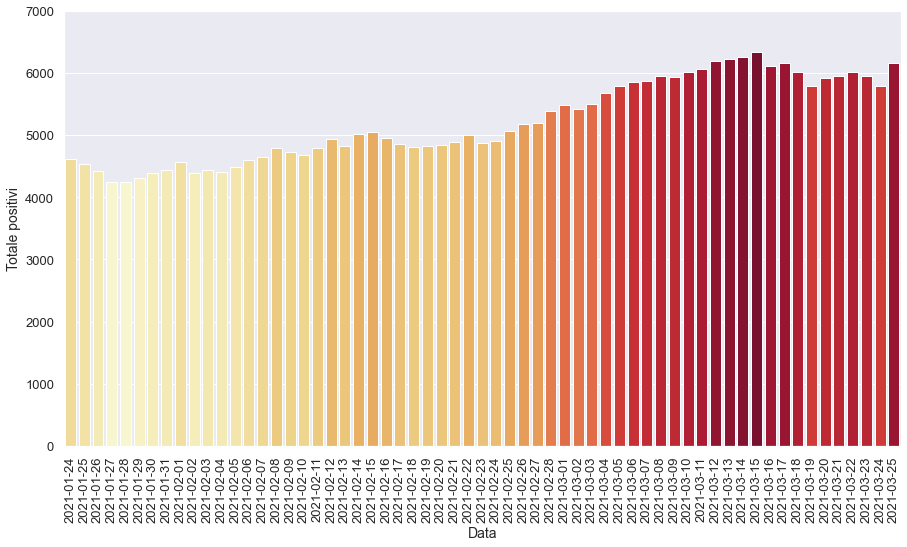

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

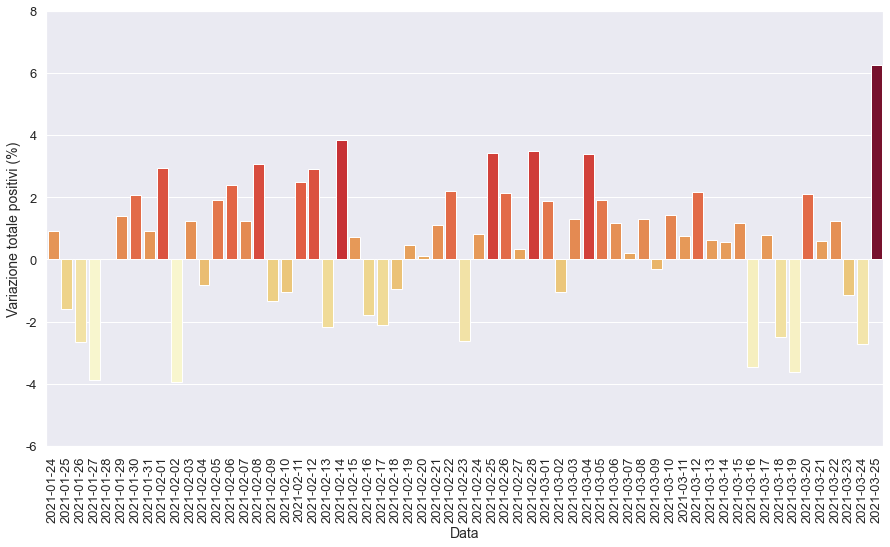

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

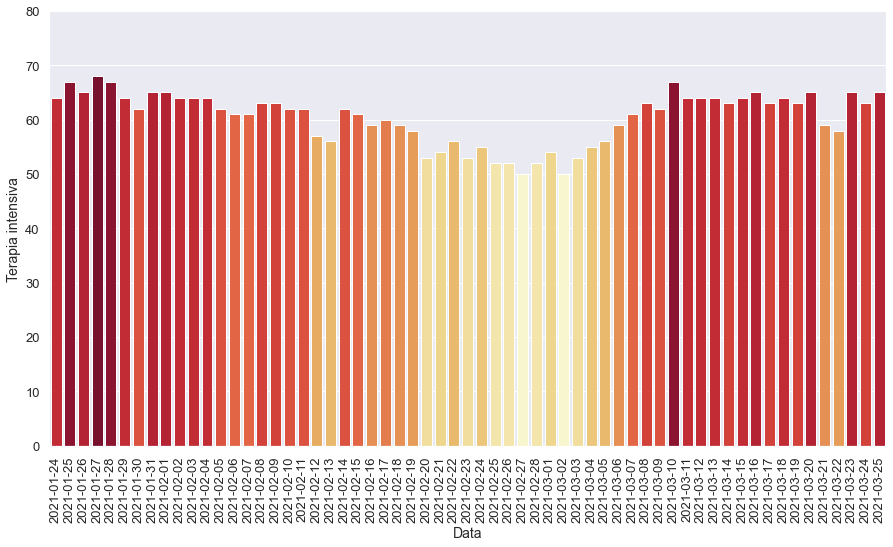

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

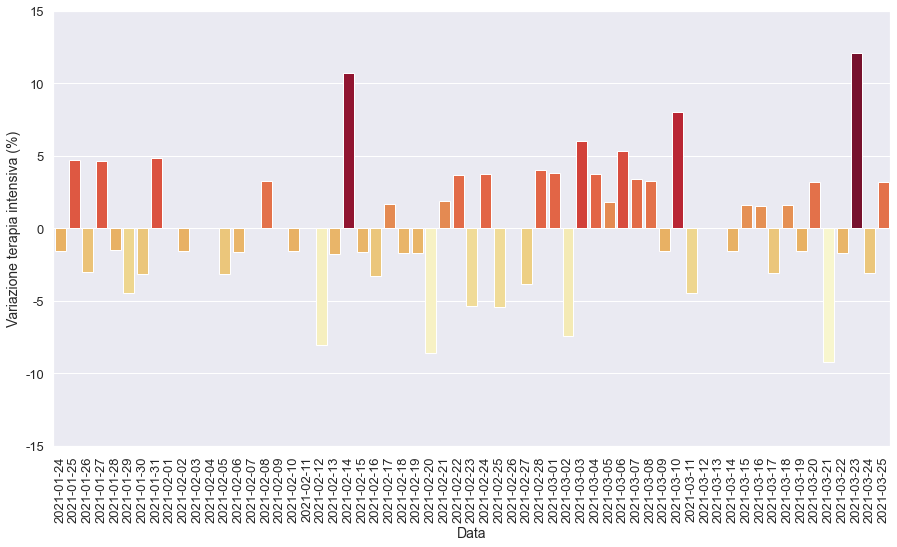

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

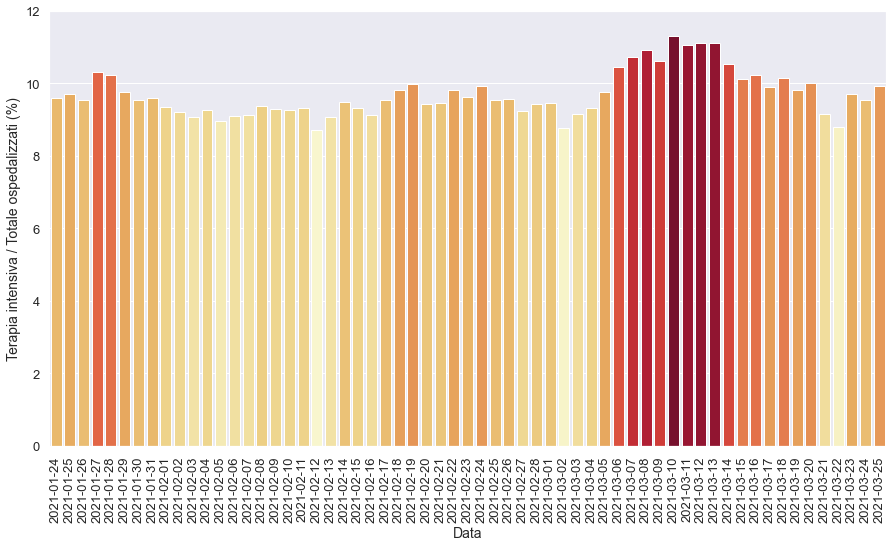

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

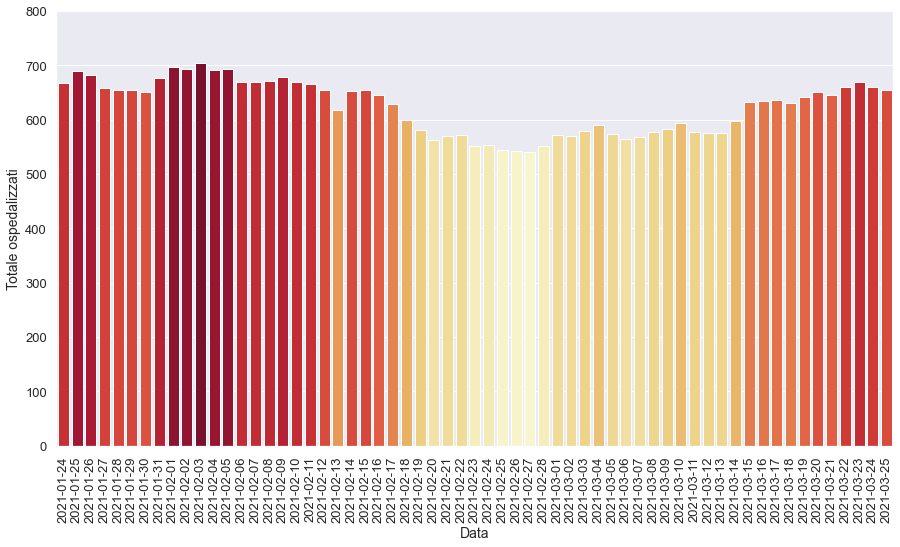

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

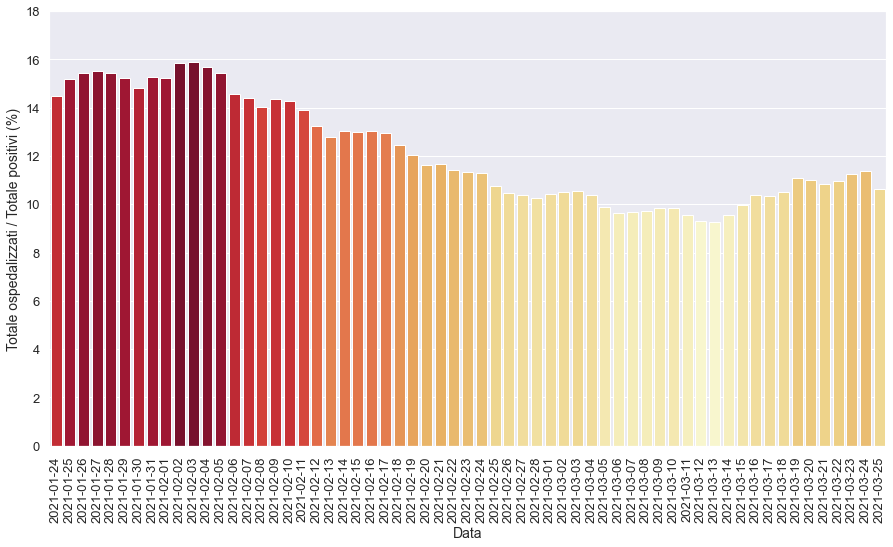

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

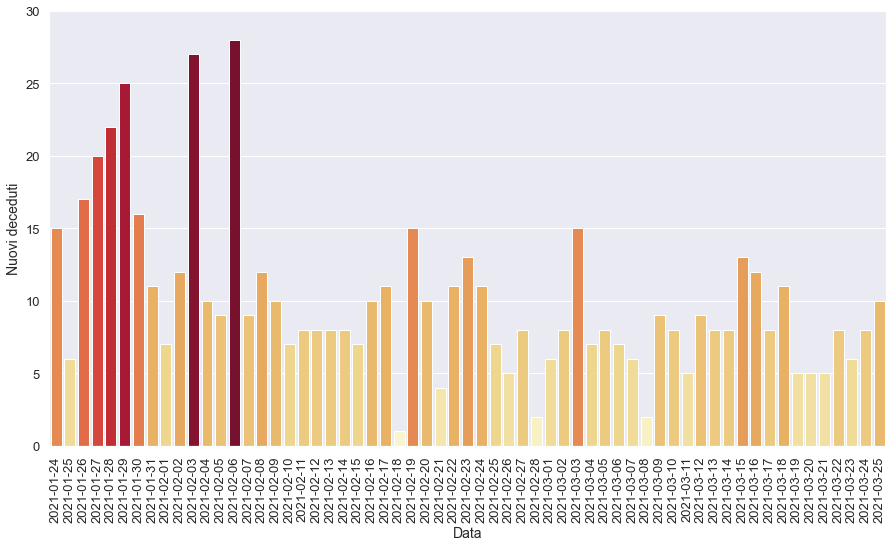

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

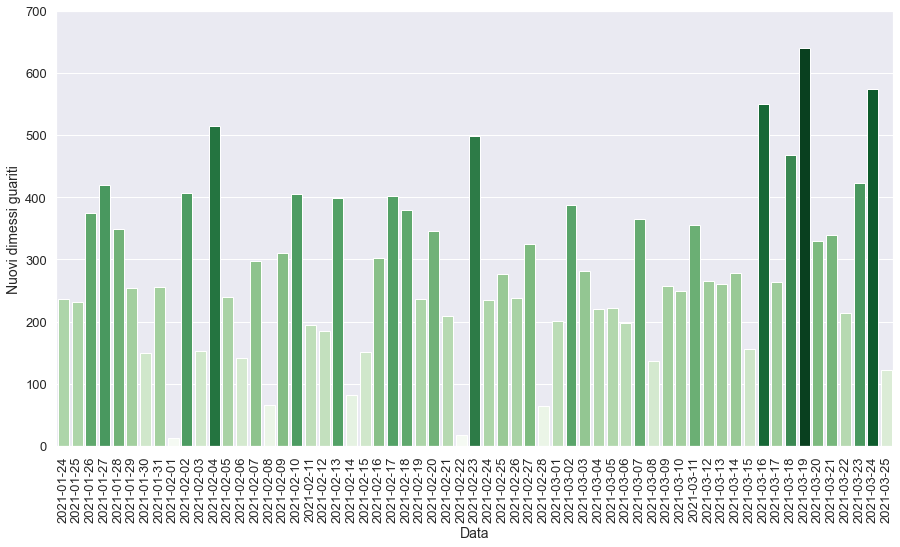

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-23T17:00:00,7,Liguria,498,53,551,4316,4867,-131,381,...,13.0,7735.0,3146.0,-111.0,9.62,11.32,4.93,12.11,-5.36,-2.62
1,2021-02-24T17:00:00,7,Liguria,499,55,554,4353,4907,40,285,...,11.0,7707.0,2829.0,37.0,9.93,11.29,3.70,10.07,3.77,0.82
2,2021-02-25T17:00:00,7,Liguria,493,52,545,4530,5075,168,452,...,7.0,8015.0,3051.0,177.0,9.54,10.74,5.64,14.81,-5.45,3.42
3,2021-02-26T17:00:00,7,Liguria,491,52,543,4640,5183,108,351,...,5.0,6542.0,2550.0,110.0,9.58,10.48,5.37,13.76,0.00,2.13
4,2021-02-27T17:00:00,7,Liguria,491,50,541,4660,5201,18,351,...,8.0,7033.0,2693.0,20.0,9.24,10.40,4.99,13.03,-3.85,0.35
5,2021-02-28T17:00:00,7,Liguria,500,52,552,4831,5383,182,248,...,2.0,4837.0,2012.0,171.0,9.42,10.25,5.13,12.33,4.00,3.50
6,2021-03-01T17:00:00,7,Liguria,517,54,571,4914,5485,102,309,...,6.0,4801.0,2249.0,83.0,9.46,10.41,6.44,13.74,3.85,1.89
7,2021-03-02T17:00:00,7,Liguria,520,50,570,4857,5427,-58,337,...,8.0,7595.0,2674.0,-57.0,8.77,10.50,4.44,12.60,-7.41,-1.06
8,2021-03-03T17:00:00,7,Liguria,526,53,579,4919,5498,71,368,...,15.0,7436.0,2796.0,62.0,9.15,10.53,4.95,13.16,6.00,1.31
9,2021-03-04T17:00:00,7,Liguria,535,55,590,5095,5685,187,414,...,7.0,7270.0,2847.0,176.0,9.32,10.38,5.69,14.54,3.77,3.40


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

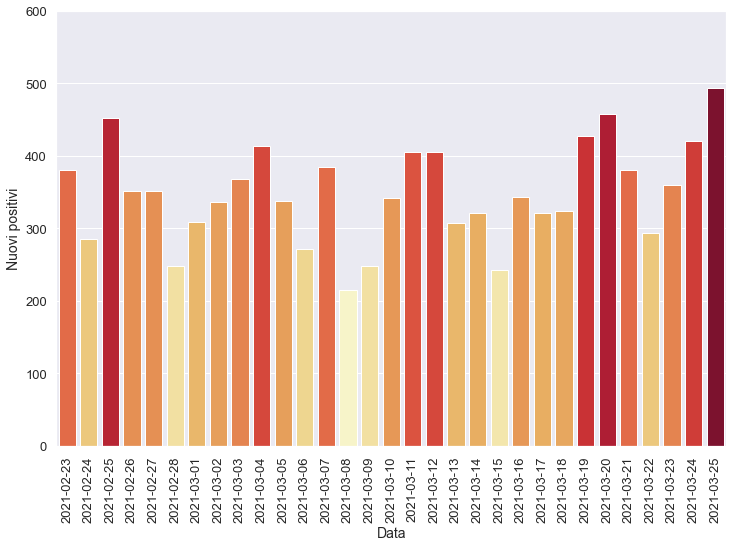

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

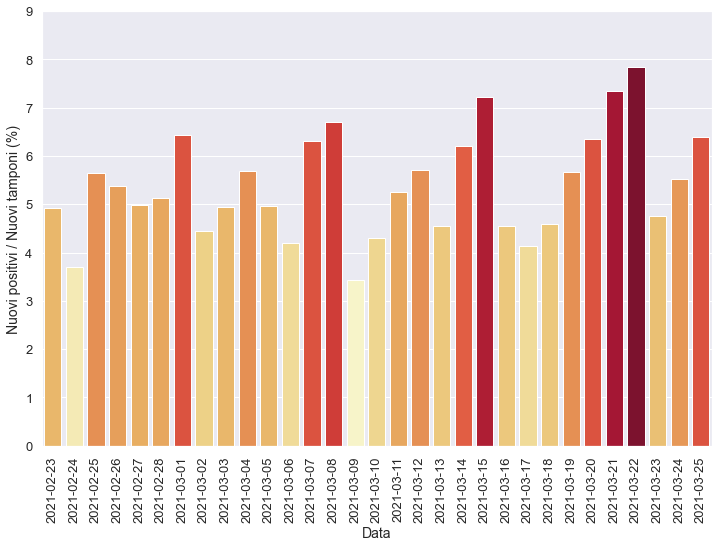

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

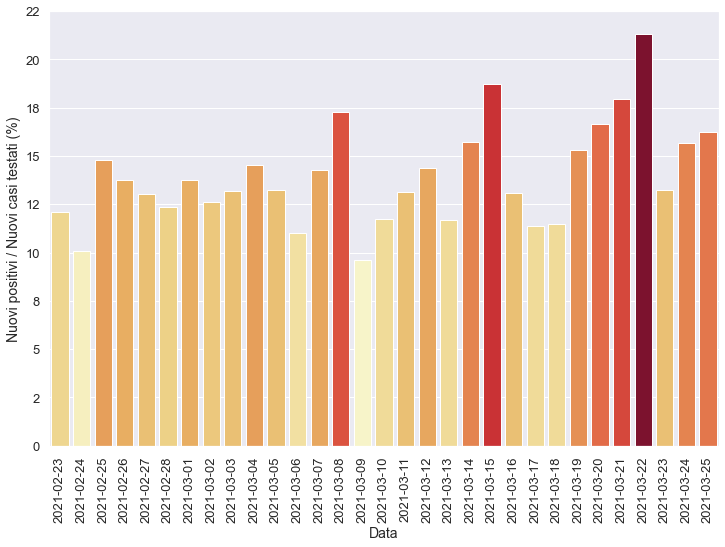

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

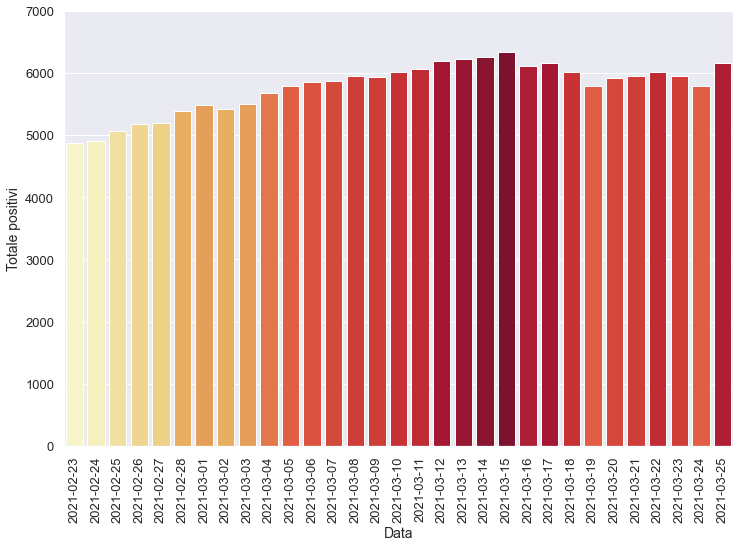

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

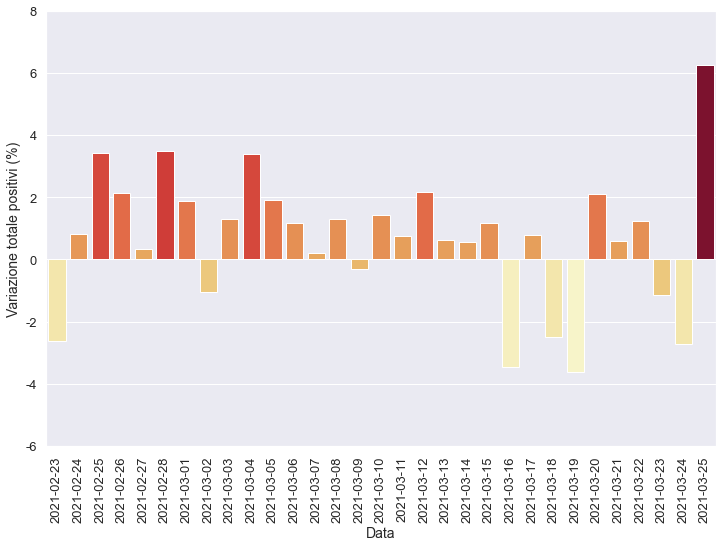

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

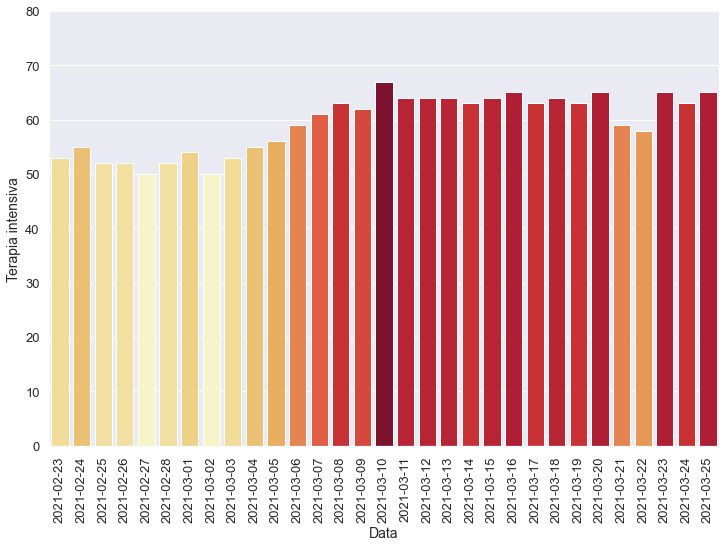

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

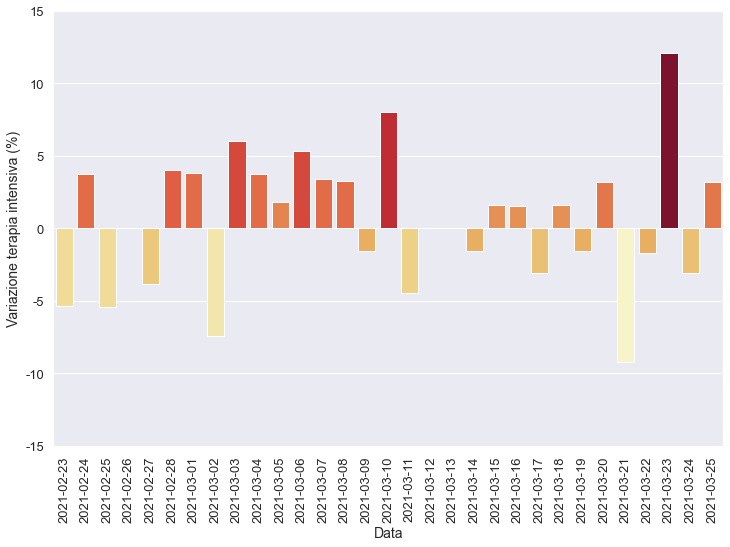

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

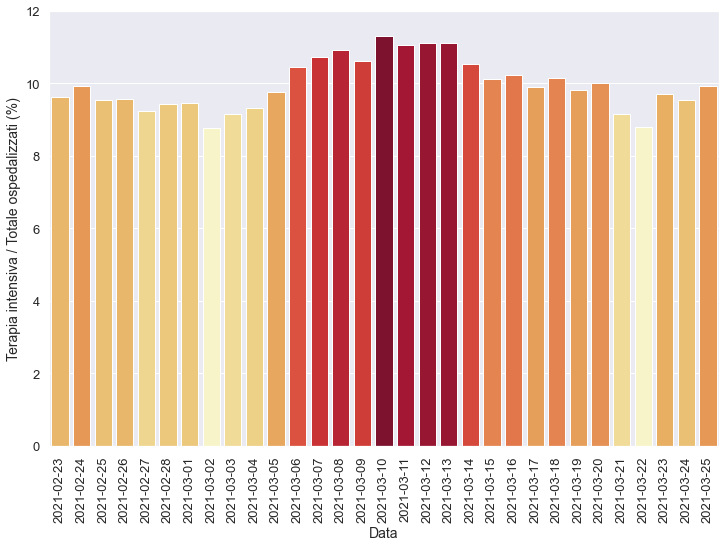

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

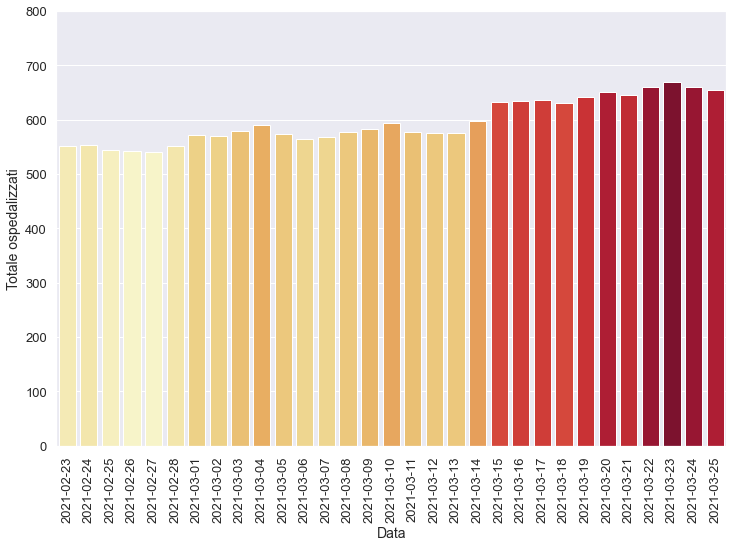

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

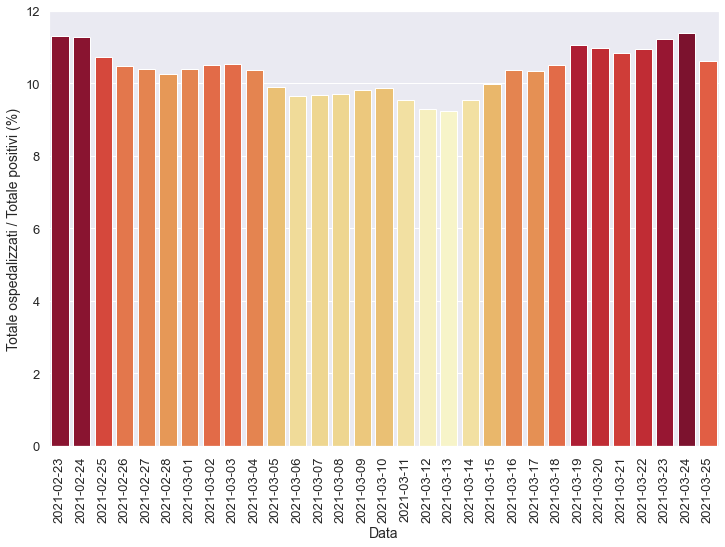

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

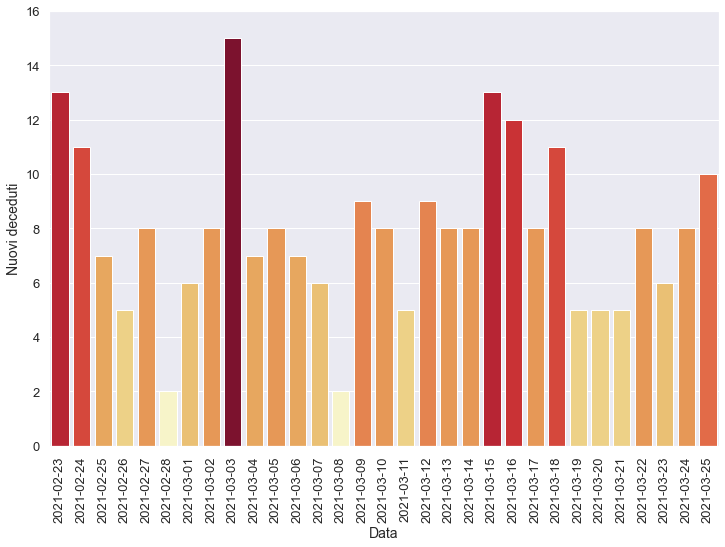

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

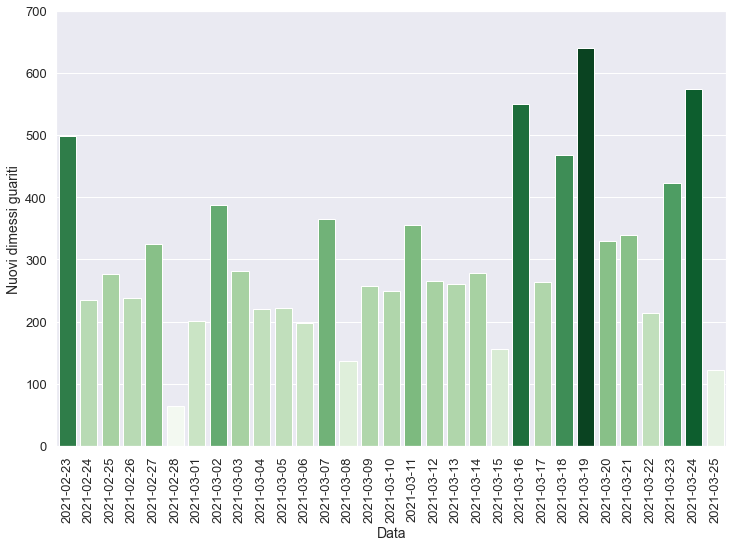

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-18T17:00:00,7,Liguria,567,64,631,5381,6012,-155,324,...,11.0,7040.0,2829.0,-149.0,10.14,10.50,4.60,11.45,1.59,-2.51
1,2021-03-19T17:00:00,7,Liguria,578,63,641,5152,5793,-219,427,...,5.0,7543.0,2793.0,-229.0,9.83,11.07,5.66,15.29,-1.56,-3.64
2,2021-03-20T17:00:00,7,Liguria,585,65,650,5266,5916,123,458,...,5.0,7229.0,2754.0,114.0,10.00,10.99,6.34,16.63,3.17,2.12
3,2021-03-21T17:00:00,7,Liguria,586,59,645,5306,5951,35,380,...,5.0,5173.0,2117.0,40.0,9.15,10.84,7.35,17.95,-9.23,0.59
4,2021-03-22T17:00:00,7,Liguria,602,58,660,5364,6024,73,294,...,8.0,3752.0,1379.0,58.0,8.79,10.96,7.84,21.32,-1.69,1.23
5,2021-03-23T17:00:00,7,Liguria,604,65,669,5286,5955,-69,360,...,6.0,7583.0,2724.0,-78.0,9.72,11.23,4.75,13.22,12.07,-1.15
6,2021-03-24T17:00:00,7,Liguria,597,63,660,5133,5793,-162,420,...,8.0,7601.0,2680.0,-153.0,9.55,11.39,5.53,15.67,-3.08,-2.72
7,2021-03-25T17:00:00,7,Liguria,589,65,654,5501,6155,362,494,...,10.0,7721.0,3043.0,368.0,9.94,10.63,6.40,16.23,3.17,6.25


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

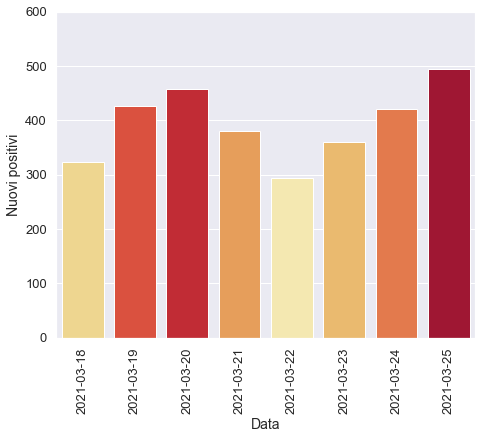

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

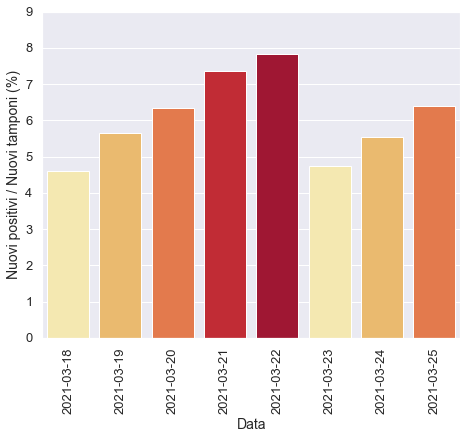

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

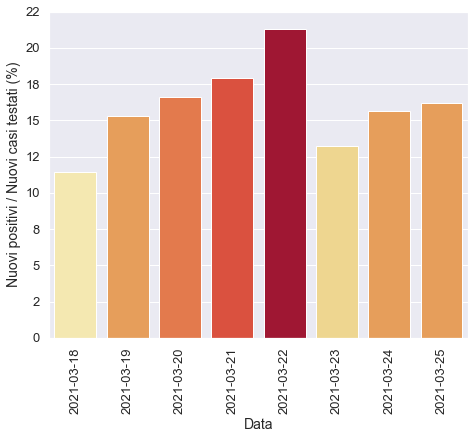

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

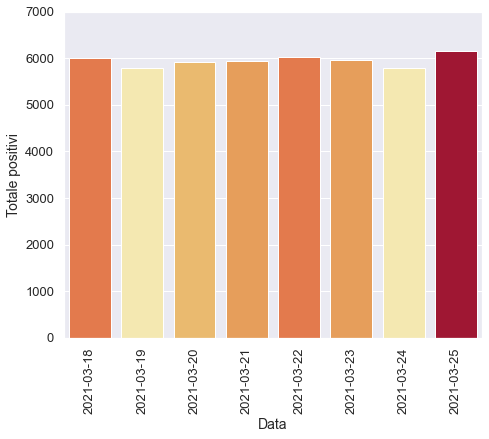

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

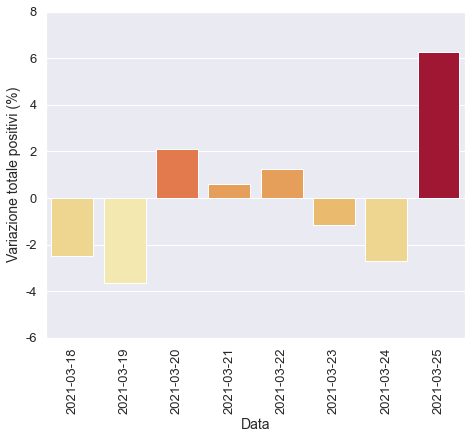

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

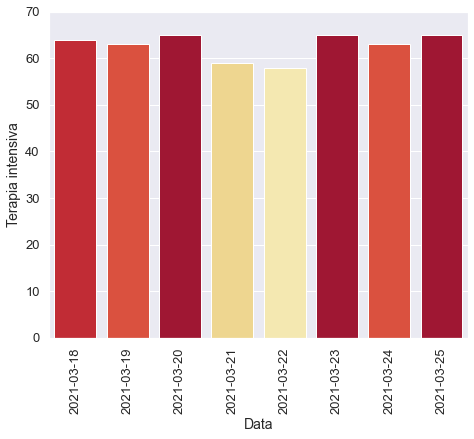

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

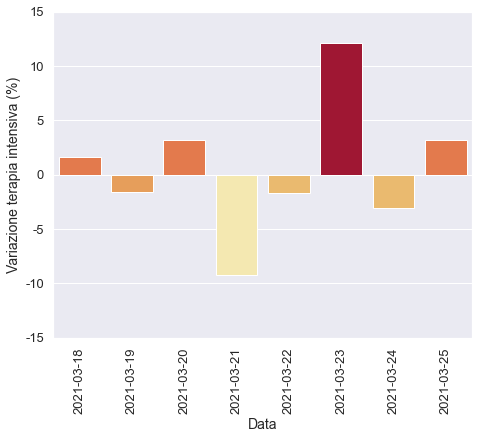

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

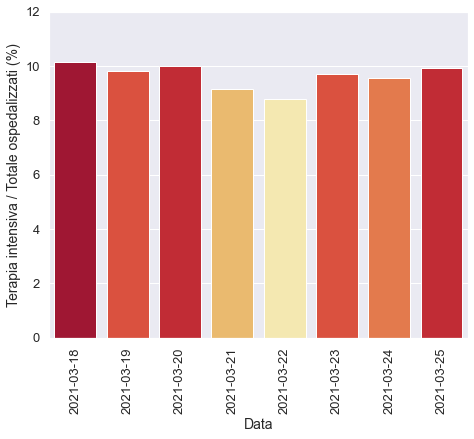

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

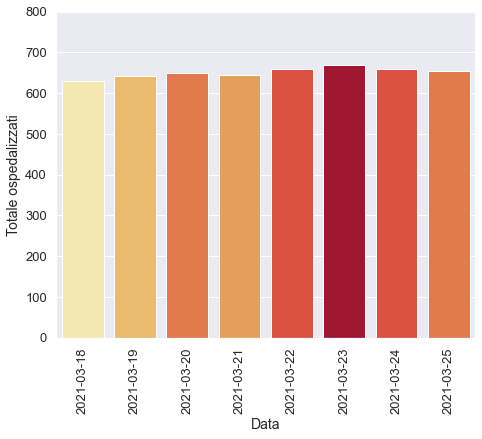

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

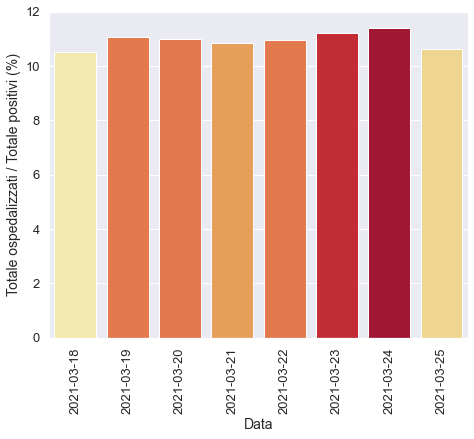

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

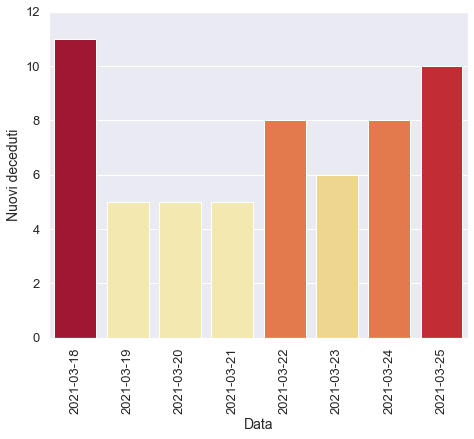

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

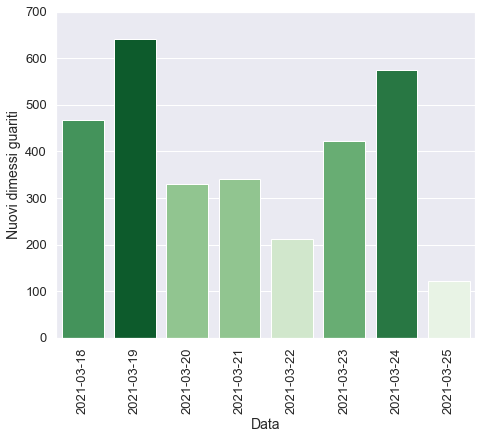

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)